Point 1: 51.774167300127, 140.06614036527, 1757850909
Point 2: 51.785854121015, 141.06567159845, 1757850919
Point 3: 51.788069644553, 142.16550858672, 1757850930
Point 4: 51.779137149344, 143.2651603542, 1757850941
Point 5: 51.759064804006, 144.36407168713, 1757850952
Point 6: 51.727870819537, 145.46167393694, 1757850963
Point 7: 51.685582784328, 146.55741914664, 1757850974
Point 8: 51.632238456729, 147.65074988506, 1757850985
Point 9: 51.567884623509, 148.74112920192, 1757850996
Point 10: 51.492577183507, 149.82803036841, 1757851007
Point 11: 51.398008263064, 151.00915948211, 1757851019
Point 12: 51.290578663809, 152.18486872404, 1757851031
Point 13: 51.18089553765, 153.25730747324, 1757851042
Point 14: 51.049128763738, 154.42088647306, 1757851054
Point 15: 50.917346308472, 155.48119809228, 1757851065
Point 16: 50.775157478254, 156.53502845538, 1757851076
Point 17: 50.636959844132, 157.48709293184, 1757851086
Point 18: 50.460023468973, 158.62163691218, 1757851098
Point 19: 50.30343753

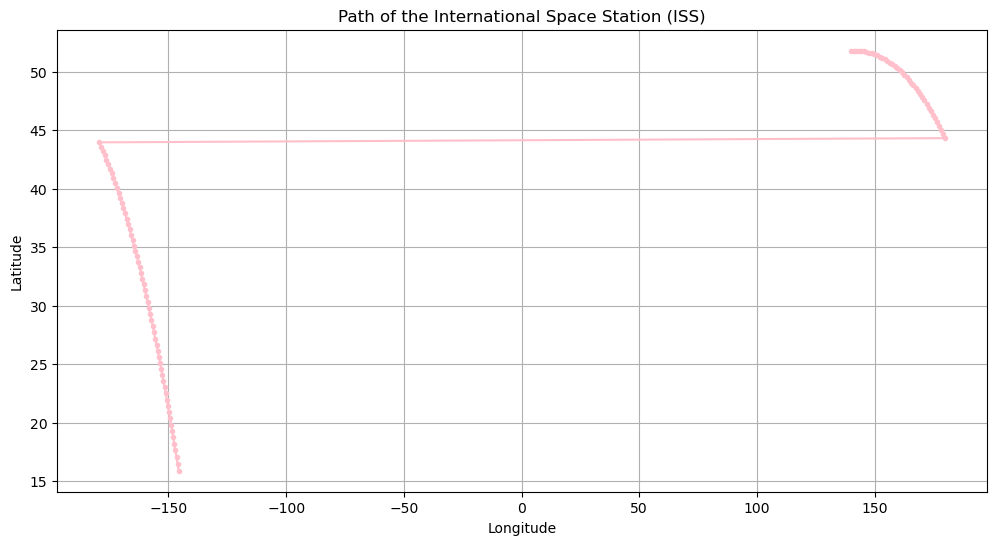

In [1]:
"""
Install the following libraries: `requests`, `matplotlib`.
    in terminal: pip install requests matplotlib 
Use `requests` to track the location of the International Space Station. Generate at least 100 data points with the latitude, longitude, and timestamp of the data point. You may do this by pinging this API once every 10 seconds for 17 or so minutes.
    https://api.wheretheiss.at/v1/satellites/25544
Use `matplotlib` to illustrate the path of the ISS. Use any visualization you feel is appropriate.
"""

import requests
import time
import pandas as pd
import matplotlib.pyplot as plt

data = []

for i in range(100):
    response = requests.get("https://api.wheretheiss.at/v1/satellites/25544")
    iss_data = response.json()

    timestamp = iss_data['timestamp']
    lat = iss_data['latitude']
    lon = iss_data['longitude']

    data.append({
        "timestamp": timestamp,
        "latitude": lat,
        "longitude": lon
    })

    print(f"Point {i+1}: {lat}, {lon}, {timestamp}")
    
    time.sleep(10)

df = pd.DataFrame(data)
df.to_csv("iss_data.csv", index=False)

plt.figure(figsize=(12,6))
plt.plot(df['longitude'], df['latitude'], marker='o', markersize=3, linestyle='-', color='pink')
plt.title('Path of the International Space Station (ISS)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()